# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [25]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
X = pd.DataFrame(boston, columns =  ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])


In [27]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
y = pd.DataFrame(boston, columns = ['MEDV'])

In [29]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [30]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [31]:
y.dtypes

MEDV    float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [32]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


LSTAT e RM parecem ter uma boa correlação com MEDV

### 3. Separe os dados em validação e teste

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [34]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [35]:
y_pred_train_regr_1 = regr_1.predict(X_train)
y_pred_test_regr_1 = regr_1.predict(X_test)

y_pred_train_regr_2 = regr_2.predict(X_train)
y_pred_test_regr_2 = regr_2.predict(X_test)

# Cálculo do MSE
mse_train_regr_1 = mean_squared_error(y_train, y_pred_train_regr_1)
mse_test_regr_1 = mean_squared_error(y_test, y_pred_test_regr_1)

mse_train_regr_2 = mean_squared_error(y_train, y_pred_train_regr_2)
mse_test_regr_2 = mean_squared_error(y_test, y_pred_test_regr_2)

template = "MSE da árvore com profundidade {0} para a base {1} é: {2:.2f}"

print(template.format(regr_1.get_depth(), "de treinamento", mse_train_regr_1).replace(".", ","))
print(template.format(regr_1.get_depth(), "de testes", mse_test_regr_1).replace(".", ","))

print(template.format(regr_2.get_depth(), "de treinamento", mse_train_regr_2).replace(".", ","))
print(template.format(regr_2.get_depth(), "de testes", mse_test_regr_2).replace(".", ","))

MSE da árvore com profundidade 2 para a base de treinamento é: 25,85
MSE da árvore com profundidade 2 para a base de testes é: 26,46
MSE da árvore com profundidade 8 para a base de treinamento é: 1,80
MSE da árvore com profundidade 8 para a base de testes é: 20,35


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A com profundidade de 8, mas deve-se repensar se há overfitting

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

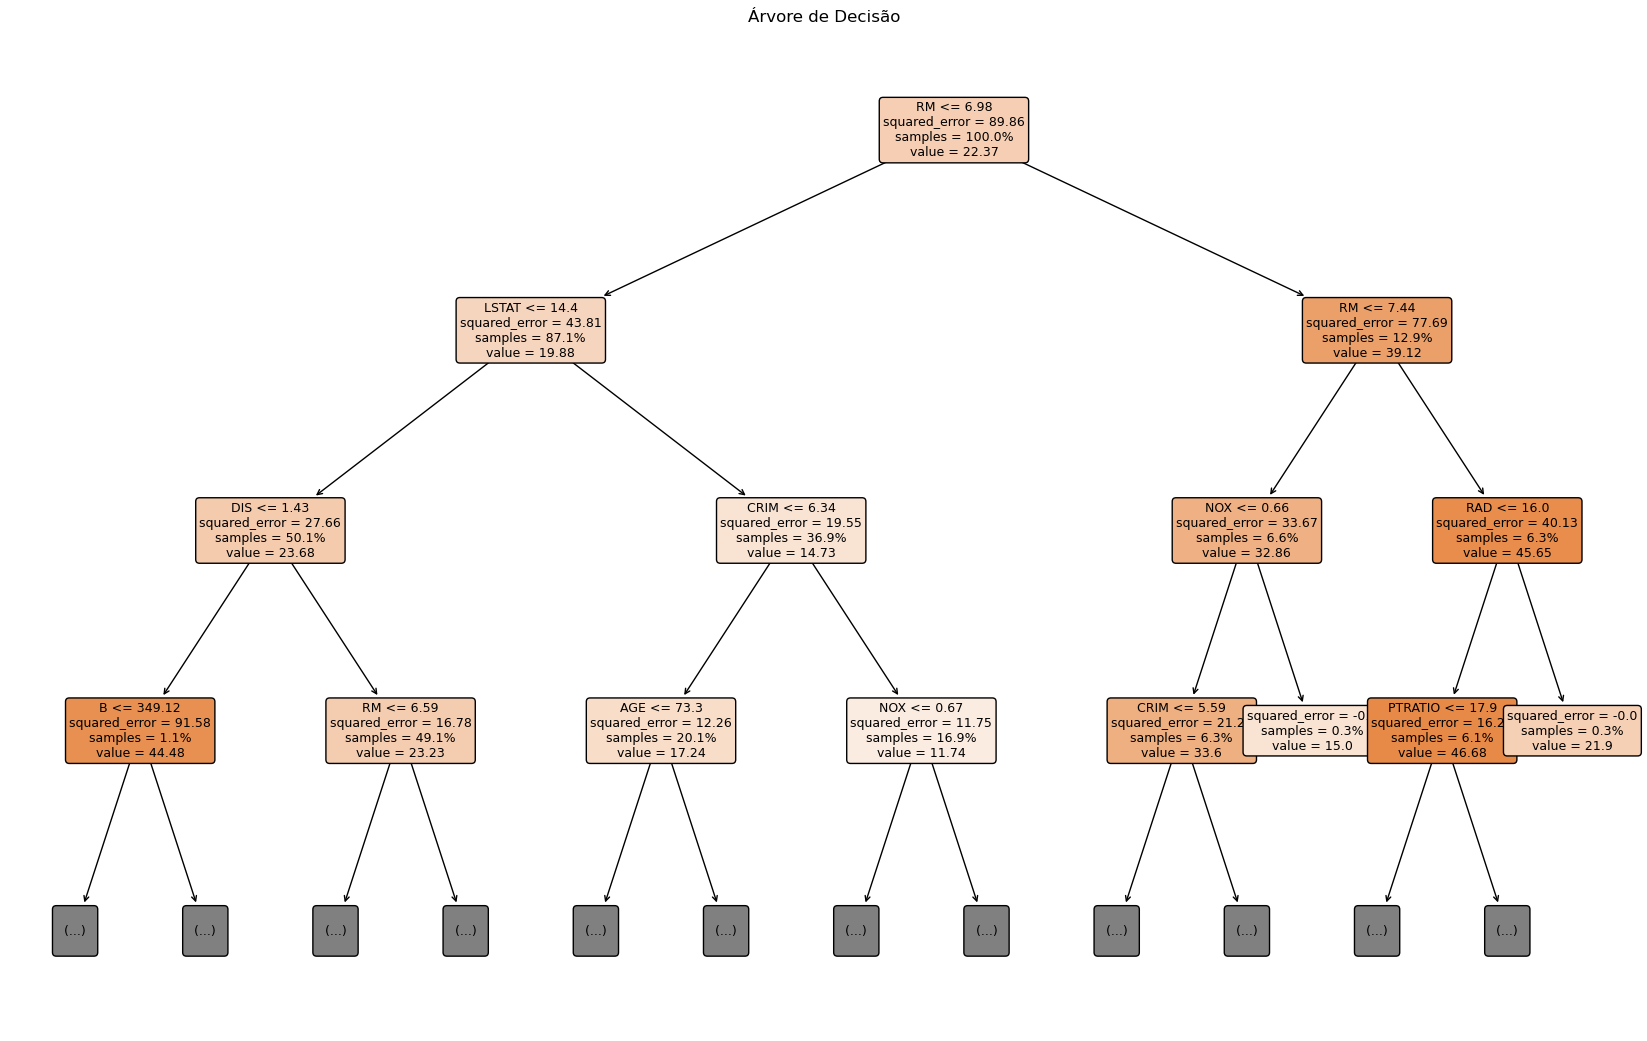

In [37]:

plt.figure(figsize=(21, 13))
plt.rcParams.update({'font.size': 10})


tree.plot_tree(regr_2, 
               feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], 
               filled=True,
               fontsize=9, 
               max_depth=3, # limite a profundidade da árvore
               label='all', # mostre todos os valores de cada nó
               proportion=True, # mostre a proporção de instâncias de cada classe
               rounded=True, # torne os cantos dos nós arredondados
               precision=2) # arredonde para 2 casas decimais

plt.title("Árvore de Decisão") # adicione um título
plt.xlabel("Características") # rótulo do eixo x
plt.ylabel("Classe") # rótulo do eixo y

plt.show()

A variável RM parece ter mais importância